In [2]:
#On doit d'abord importer la librairie d'où on va tirer nos fonctions
import numpy as np

#On va générer des données aléatoires(notre dataset) avec lesquelles travailler 
from sklearn.datasets import make_regression
#Pour faire des graphes
import matplotlib.pyplot as plt

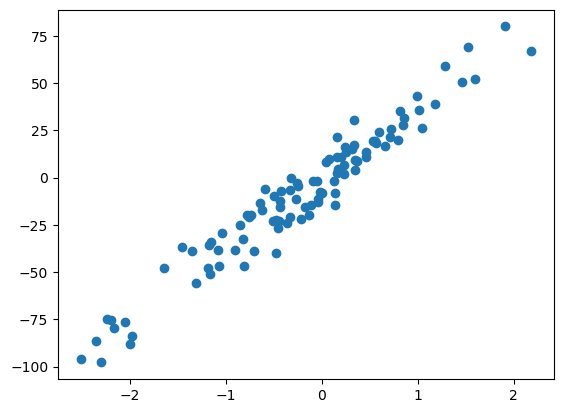

In [36]:
#**Dataset** avec un vecteur x et un vecteur y pour 100 exemples une feature x et du bruit 
x, y = make_regression(n_samples=100, n_features=1, noise=10)
#Représentation de y en fonction de x
plt.scatter(x, y )

In [37]:
#On va vérifier les dimensions de nos matrices
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [38]:
#C'est normal que le vecteur y fourni par make regression n'ait pas de 
#dimensions bien définies; On va donc redimensionner y avec reshape
#et on va réutiliser sa dimension en x et puis définir celle en y à 1
y=y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)


(100, 1)
(100, 1)


In [39]:
#Là on voit que c'est carré pour les futures multiplications so next
#On va créer la matrice X avec les 1 qu'il lui faut S/O les maths
X= np.hstack((x, np.ones(x.shape))) 
X
#hstack sert à coller des matrices là c'est x et un vecteur de 1 avec la méme taille que x


array([[-1.65188682,  1.        ],
       [ 0.13863307,  1.        ],
       [ 0.79723155,  1.        ],
       [-0.91070553,  1.        ],
       [-0.21511778,  1.        ],
       [-2.20416224,  1.        ],
       [-1.98017495,  1.        ],
       [ 0.56786167,  1.        ],
       [ 0.99672662,  1.        ],
       [ 0.33372861,  1.        ],
       [ 0.12272871,  1.        ],
       [ 0.34521072,  1.        ],
       [-0.25190707,  1.        ],
       [ 0.8177635 ,  1.        ],
       [-2.23614762,  1.        ],
       [-1.07385926,  1.        ],
       [-0.33386197,  1.        ],
       [ 0.15483895,  1.        ],
       [-0.04236327,  1.        ],
       [ 0.24894853,  1.        ],
       [-2.30709195,  1.        ],
       [ 0.46337149,  1.        ],
       [-1.08854039,  1.        ],
       [-0.11065573,  1.        ],
       [ 0.65555878,  1.        ],
       [-0.76506733,  1.        ],
       [-1.1855001 ,  1.        ],
       [ 1.18317644,  1.        ],
       [ 0.23077115,

In [40]:
#On va initialiser le vecteur theta de dimension 2,1 (a,b) pour qui on doit donner des valeurs aléatoires
theta=np.random.randn(2, 1)
theta

array([[-0.59542083],
       [-0.70017774]])

#MODELE


In [41]:
#On va définir notre modèle qui est une fonction qui dépend des arguments X et theta
def model(X, theta):
    return X.dot(theta)
# instructions c'est juste produit entre X et theta

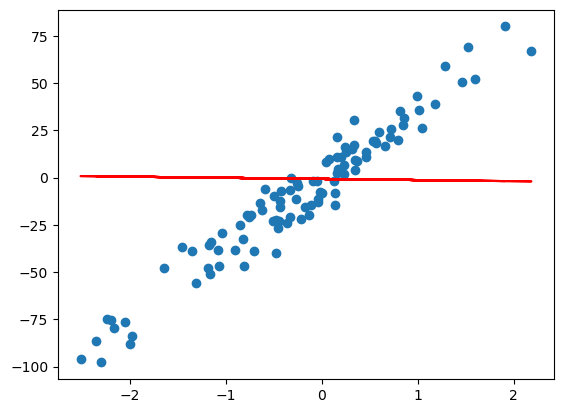

In [42]:
#On va comparer la droite de notre modèle avec la réalité soit les points 
plt.plot(x, model(X, theta), c='r')
plt.scatter(x, y)

On voit que la droite n'est pas parmi les points logiquement avec un theta aléatoire

FONCTION COUT

In [43]:
#On définit notre fonction cout
#m est le nombre d'exemples lié à la taille(length) de y
def cost_function(x, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [44]:
cost_function(X,y, theta)

717.8689849087738

On voit que notre fonction cout qui quantifie l'écart avec la courbe est énorme
alors qu'elle doit étre minimale

GRADIENTS ET DESCENTE DE GRADIENTS


In [45]:
#On définit notre fonction gradient avec la formule de base le T veut dire transposée
#dot c'est multiplication S/O la formule des maths
def grad(X, y , theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
    

In [87]:
#Fonction descente de gradients qui dépend aussi dun learning
#rate les pas qu'on fait pour descendre la vallée et trouver le point le plus bas
def gradient_descent(X,y, theta, learning_rate, n_iterations):
    cost_history =np.zeros(n_iterations)
#Algorithme itératif, on va répéter l'opération plusieurs fois en mettant à jour theta
#donc boucle for
    for i in range (0, n_iterations):
        theta = theta - learning_rate * grad(X,y, theta)
        cost_history[i]= cost_function(X, y, theta)

    return theta, cost_history

In [88]:
theta.shape

(2, 1)

In [89]:
theta_final, cost_history= gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
# theta final c'est celui après les calculs en gros
#Ne pas oublier que le learning rate doit etre ni trop petit 
#ni trop grand c'est à nous de le définir de manière un peu empirique



In [90]:
theta_final
#Là t'as ton thetafinal mais aussi la fonction cout qui sont affichés

array([[36.43064396],
       [-0.97785656]])

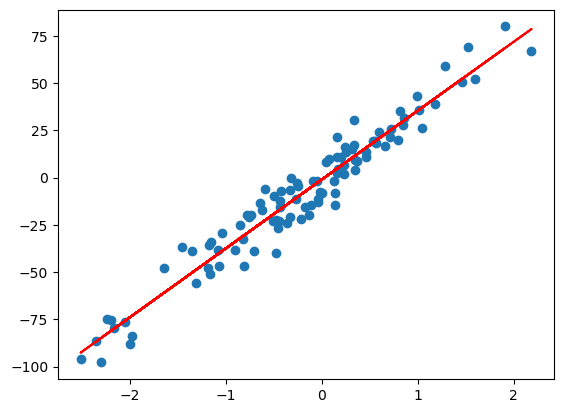

In [91]:
#En termes de dimension en tout cas on est carré
#On va voir si nos paramètres nous donnent de bons résultats en créant 
#une fonction qui va utiliser les paramètres de theta_final
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')




In [92]:
#On voit que notre droite est pas mal mais c'est possible de l'améliorer via
#le paramètres alpha(pas) ou le nombre d'itérations (crari on continue de calculer
#avec d'autres boucles for on va trouver un  nouveau minimum
#On va modifier notre learning rate et on aura un meilleur résultat que tu vas voir là 
#qui est presque parfait



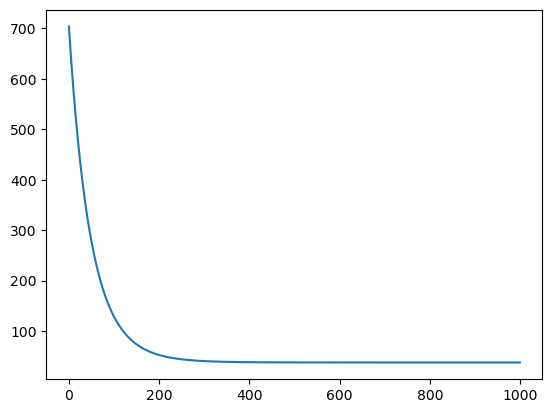

In [93]:
plt.plot(range(1000), cost_history)
#On a défini la valeur cost_history 
#qui nous montre l'évolution de la fonction cout au cours des 1000 itérations

In [94]:
#On voit au bout de 400 itérations que la fonction cout n'évolue presque plus

In [99]:
#On va maintenant voir le coefficient de détermination Rcarré qu'on affiche souvent sur excel
#Il évalue la performance du modèle de régression linéaire, 
#plus il est proche de 1 plus notre modèle rentre dans le nuage de points

#formule de R2 trouvable sur le site de machinelearnia.com
#ymean moyenne de y; sum() pour appliquer la somme sur ces termes

def coef_determination(y, predictions):
    #En général on la scinde en 2 variables u et v 
    u= ((y - predictions)**2).sum()
    v=((y - y.mean())**2).sum()
    return 1 - u/v
    


In [100]:
coef_determination(y, predictions)

0.9433412935456661

In [ ]:
#Très proche de 1 donc oklm
#On a regardé les bails pour la première variable x0 du coup faut juste remplacer les
"